In [1]:
from datetime import datetime
import pandas as pd 
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from scipy.optimize import minimize
import scipy.stats
from scipy import stats
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter('ignore')
def keep_cols(DataFrame, keep_these):
    """Keep only the columns [keep_these] in a DataFrame, delete
    all other columns. 
    """
    drop_these = list(set(list(DataFrame)) - set(keep_these))
    return DataFrame.drop(drop_these, axis = 1)

In [2]:
#1. Import the data
newyork=pd.read_csv("NYC_Free_Public_WiFi_03292017.csv", sep=",")
newyorkdf=newyork.pipe(keep_cols, ['LAT', 'LON'])

In [8]:
newyork.head()

,BORO,the_geom,TYPE,OBJECTID,PROVIDER,NAME,LAT,LOCATION,LON,X,...,NTACODE,NTANAME,COUNDIST,POSTCODE,BOROCD,CT2010,BOROCT2010,BIN,BBL,DOITT_ID
0,QU,POINT (-73.94458300007643 40.755726999970044),Free,8641,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,40.755727,10-25 41 AVENUE,-73.944583,999603.226171,...,QN68,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,4002500,4433386,4004700100,4746
1,QU,POINT (-73.94413100020707 40.755332999617764),Free,8642,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,40.755333,10-43 41 AVENUE,-73.944131,999728.543834,...,QN68,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,4002500,4433386,4004700100,4747
2,QU,POINT (-73.94516599972107 40.75575100007361),Free,8643,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,40.755751,10-05 41 AVENUE,-73.945166,999441.701232,...,QN68,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,4002500,4433386,4004700100,4748
3,QU,POINT (-73.94516599972107 40.75575100007361),Free,8644,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,40.755751,10-05 41 AVENUE,-73.945166,999441.701232,...,QN68,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,4002500,4433386,4004700100,4749
4,QU,POINT (-73.94516599972107 40.75575100007361),Free,8645,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,40.755751,10-05 41 AVENUE,-73.945166,999441.701232,...,QN68,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,4002500,4433386,4004700100,4750


In [9]:
newyorkdf.head()

,LAT,LON
0,40.755727,-73.944583
1,40.755333,-73.944131
2,40.755751,-73.945166
3,40.755751,-73.945166
4,40.755751,-73.945166


In [3]:
#2. Determine number of clusters
wss=[]

In [4]:
wss

[]

In [5]:
value1=(newyork.shape[0]-1)*(np.var(newyorkdf['LAT'])+np.var(newyorkdf['LON']))
wss.append(value1)

In [6]:
wss

[27.70665752277275]

In [11]:
from sklearn.cluster import KMeans
for i in range(1,20):
    kmeans=KMeans(n_clusters=i+1, random_state=0).fit(newyorkdf)
    wss.append(kmeans.inertia_)
wss

[27.70665752277275,
 17.475644573747054,
 11.025258596320773,
 7.645008020823424,
 5.752319862432176,
 4.877625286222925,
 4.060265866003078,
 3.3861607564487715,
 2.9832757171950934,
 2.49186244905398,
 2.199272928568439,
 2.0360689997992525,
 1.8061369659455457,
 1.6887771886435288,
 1.588193474230056,
 1.492057468372561,
 1.3702480483274972,
 1.3030480481959348,
 1.2091938784338803,
 1.104488823859984,
 17.475644573747054,
 11.025258596320773,
 7.645008020823424,
 5.752319862432176,
 4.877625286222925,
 4.060265866003078,
 3.3861607564487715,
 2.9832757171950934,
 2.49186244905398,
 2.199272928568439,
 2.0360689997992525,
 1.8061369659455457,
 1.6887771886435288,
 1.588193474230056,
 1.492057468372561,
 1.3702480483274972,
 1.3030480481959348,
 1.2091938784338803,
 1.104488823859984]

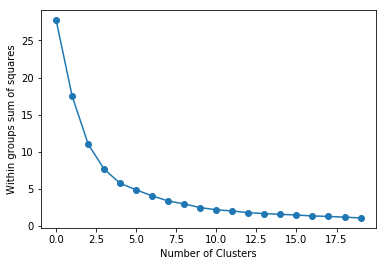

In [71]:
plt.plot(wss,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within groups sum of squares')
plt.show()

In [12]:
#3. K-Means Clustering
fit=KMeans(n_clusters=11, random_state=0).fit(newyorkdf)
fitcluster=fit.labels_
fitcluster+=1
newyorkdf['fitcluster']=fitcluster


newyorkdfgrouped =newyorkdf.groupby('fitcluster').agg(['mean'])
newyorkdfgrouped.columns = ["_".join(x) for x in newyorkdfgrouped.columns.ravel()]
newyorkdfgrouped=newyorkdfgrouped.iloc[:,0:7].reset_index()
newyorkdfgrouped=newyorkdfgrouped.iloc[:,0:7]
newyorkdfgrouped

,fitcluster,LAT_mean,LON_mean
0,1,40.770851,-73.970204
1,2,40.709714,-73.809734
2,3,40.592685,-74.108638
3,4,40.674686,-73.938705
4,5,40.853063,-73.882515
5,6,40.748251,-73.899907
6,7,40.587975,-73.798330
7,8,40.816125,-73.941150
8,9,40.689421,-73.993074
9,10,40.738452,-73.988215


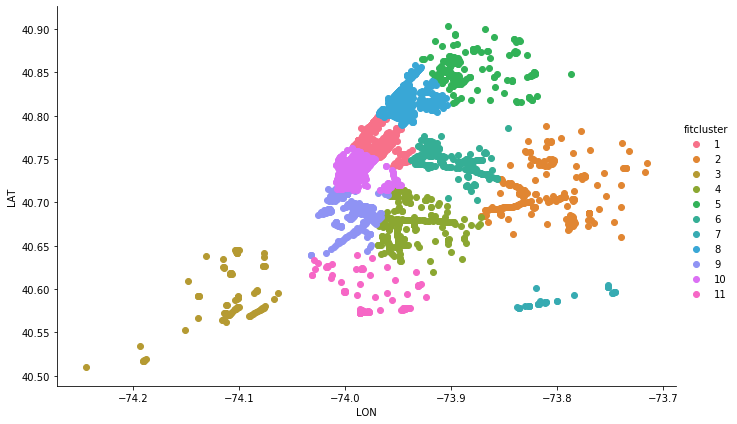

In [13]:
import seaborn
from  matplotlib import pyplot

fg = seaborn.FacetGrid(data=newyorkdf, hue='fitcluster', aspect=1.6,height=6)
fg.map(pyplot.scatter, 'LON', 'LAT').add_legend()


In [74]:
df = pd.DataFrame({'fit':fitcluster})
databars=df['fit'].value_counts()
databars

10    631
8     592
1     565
9     414
4     253
2     235
6     220
5     204
3     100
11     94
7      37
Name: fit, dtype: int64

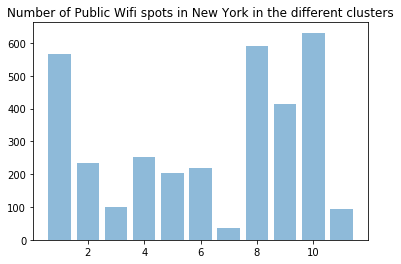

In [77]:
x = [10,8,1,9,4,2,6,5,3,11,7]
plt.bar(x, databars, align='center', alpha=0.5)
plt.title('Number of Public Wifi spots in New York in the different clusters')
plt.show()